# Model 3: AlexNet





In [ ]:
# Import required libraries
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

print("Loaded all libraries")

Loaded all libraries


Using TensorFlow backend.


In [ ]:
# Set the file path to the dataset and a random seed for reproducibility
fpath = "../input/dataset-aider/AIDER/"
random_seed = 42

# Print the list of selected categories and the total number of categories
categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['collapsed_building', 'normal', 'fire', 'traffic_incident', 'flooded_areas'] 

No. of categories =  5


In [ ]:
# Define a function to load images and corresponding labels for specified categories
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            img_array = Image.fromarray(img, 'RGB')

            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))

            img_lst.append(np.array(resized_img))

            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  6433 
No. of labels loaded =  6433
<class 'list'> <class 'list'>


In [ ]:
# Convert lists of images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print the shapes and types of the images and labels arrays
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (6433, 227, 227, 3) 
Labels shape =  (6433,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


- Check few random images and labels by displaying them in a graph

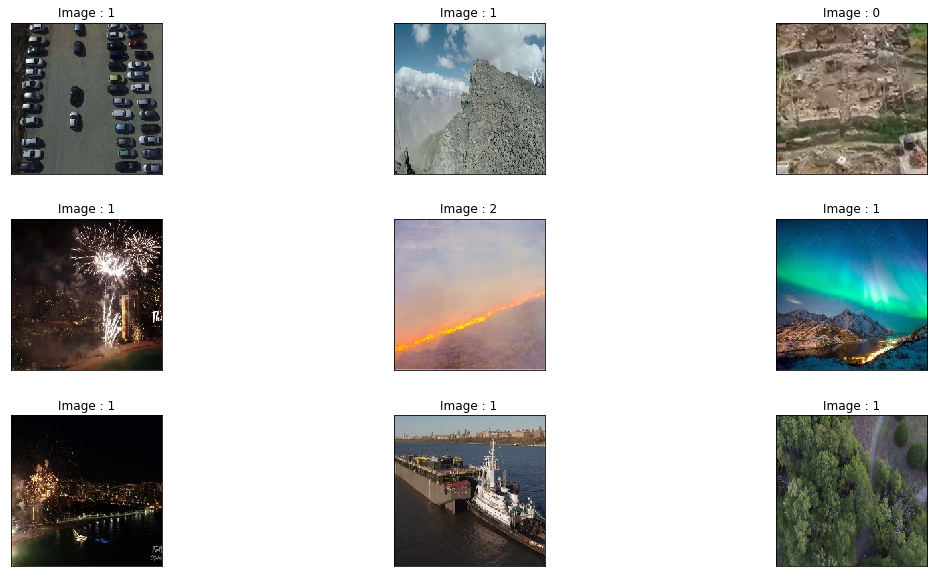

In [ ]:
# Define a function to display random images from the dataset
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0 , images.shape[0] , 1)

        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])

        plt.title('Image : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])

    plt.show()

display_rand_images(images, labels)

In [ ]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 6430 6431 6432]

'n' values after shuffling =  [4092 6282 3237 ... 5226 5390  860]


In [ ]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (6433, 227, 227, 3) 
Labels shape after shuffling =  (6433,)


In [ ]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (6433, 227, 227, 3)


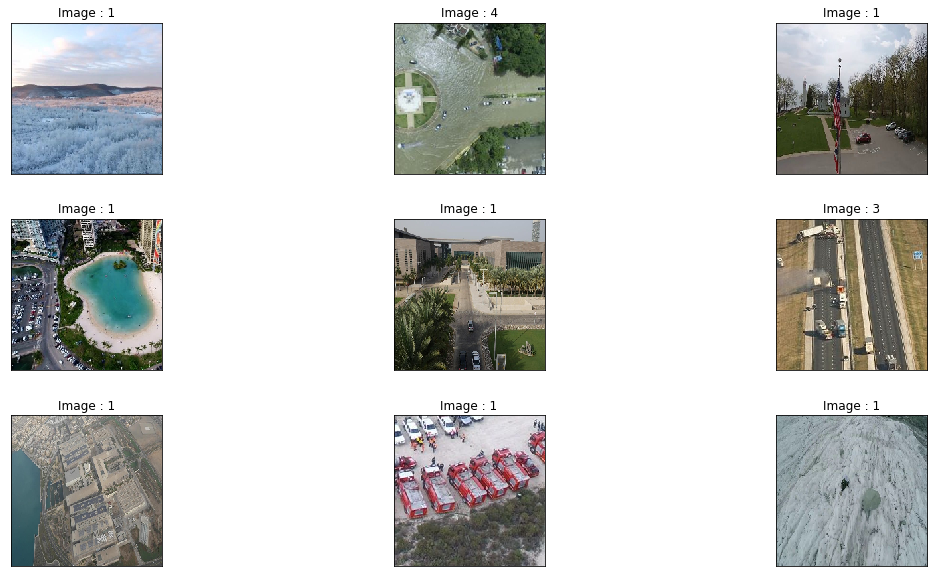

In [ ]:
display_rand_images(images, labels)

In [ ]:
#Split the loaded dataset into train, test sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (5146, 227, 227, 3)
y_train shape =  (5146,)

x_test shape =  (1287, 227, 227, 3)
y_test shape =  (1287,)


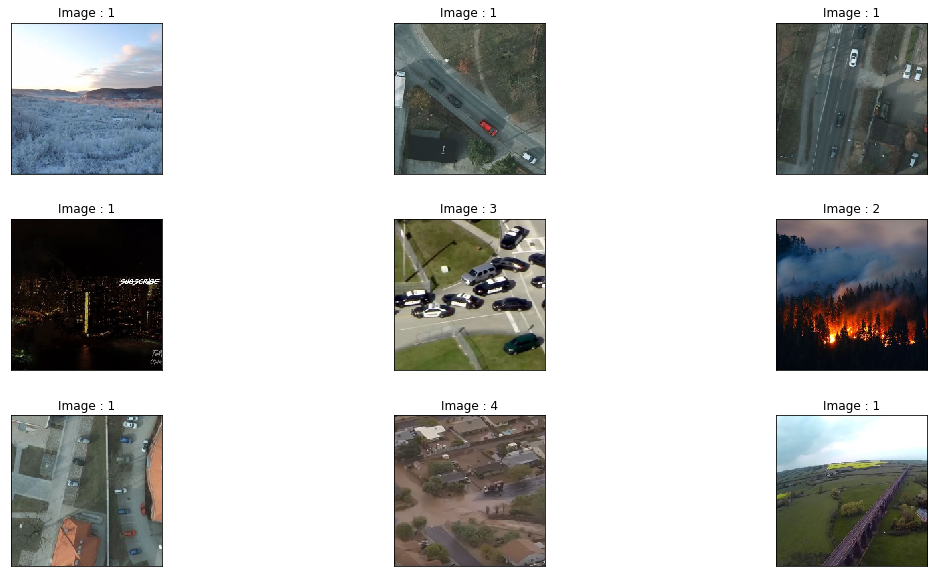

In [ ]:
display_rand_images(x_train, y_train)

In [ ]:
from tensorflow.keras.regularizers import l2
from keras.constraints import max_norm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2


model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

model.add(Conv2D(filters=96, kernel_size=(1, 1), kernel_regularizer=l2(0.01)))


#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(1, 1), kernel_regularizer=l2(0.01)))


#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

model.add(Conv2D(filters=384, kernel_size=(1, 1), kernel_regularizer=l2(0.01)))


#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 55, 96)        9312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 23, 256)       65792     
___________________________

In [ ]:
# Compile the CNN model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
%%time

#Fit the model using training data
model.fit(x_train, y_train, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
5146/5146 [==============================] - 10s 2ms/sample - loss: 6.7120 - acc: 0.5713
Epoch 2/100
5146/5146 [==============================] - 6s 1ms/sample - loss: 2.3374 - acc: 0.6912
Epoch 3/100
5146/5146 [==============================] - 6s 1ms/sample - loss: 1.2833 - acc: 0.7087
Epoch 4/100
5146/5146 [==============================] - 6s 1ms/sample - loss: 1.0036 - acc: 0.7194
Epoch 5/100
5146/5146 [==============================] - 6s 1ms/sample - loss: 0.8627 - acc: 0.7388
Epoch 6/100
5146/5146 [==============================] - 6s 1ms/sample - loss: 0.7984 - acc: 0.7474
Epoch 7/100
5146/5146 [==============================] - 6s 1ms/sample - loss: 0.7350 - acc: 0.7588
Epoch 8/100
5146/5146 [==============================] - 6s 1ms/sample - loss: 0.7439 - acc: 0.7586
Epoch 9/100
5146/5146 [==============================] - 6s 1ms/sample - loss: 0.7063 - acc: 0.7670
Epoch 10/100
5146/5146 [===========================

In [ ]:
#Metrics to evaluate accuracy and loss in test dataset
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

1287/1287 [==============================] - 1s 761us/sample - loss: 0.8443 - acc: 0.8003
0.8442786663377017 0.8003108


In [ ]:
#Predict values using the trained model
pred = model.predict(x_test)

pred.shape

(1287, 20)

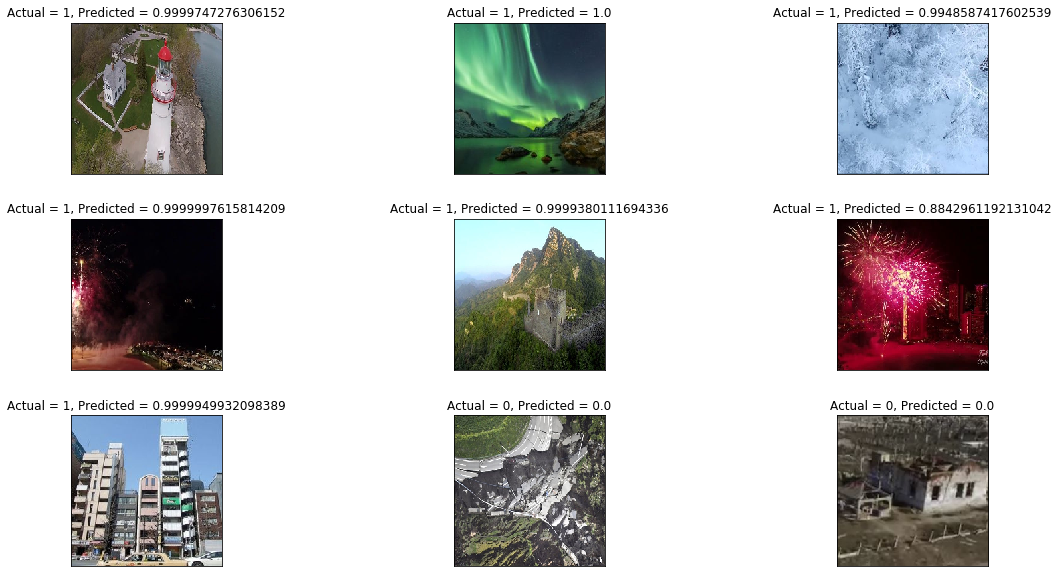

In [ ]:
# Display few random images with actual vs predicted values of labels
plt.figure(1 , figsize = (19 , 10))
n = 0

for i in range(9):
    n += 1
    r = np.random.randint( 0, x_test.shape[0], 1)

    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
layer_weights = model.layers[0].get_weights()
print("Layer Weights:", layer_weights)

Layer Weights: [array([[[[-3.03276889e-02, -9.95586291e-02, -2.00396627e-02, ...,
          -2.22041979e-02, -2.86854859e-02, -4.33418527e-02],
         [-1.50675038e-02, -2.44020894e-02,  1.47970831e-02, ...,
          -1.99077334e-02, -2.63487473e-02, -3.86164486e-02],
         [-9.37600993e-03, -6.01898469e-02,  7.97173195e-03, ...,
           1.00395065e-02, -4.88099381e-02, -2.34096069e-02]],

        [[-3.12868468e-02, -1.50057256e-01, -1.04785413e-02, ...,
          -3.73942801e-03, -1.59763992e-02, -3.13397497e-02],
         [-2.23684032e-02, -1.05264448e-01, -1.17319077e-02, ...,
          -2.46354248e-02, -6.04992174e-03, -3.34415324e-02],
         [-1.26683293e-02, -1.39943063e-01, -3.89659568e-03, ...,
          -1.63369235e-02, -4.69980203e-02, -4.66812029e-02]],

        [[-3.79517600e-02, -1.35347486e-01,  2.88091809e-03, ...,
          -2.42596585e-02, -1.70814842e-02, -3.87097187e-02],
         [-3.54739353e-02, -4.54136841e-02, -8.71811900e-03, ...,
          -2.42427